# Predicting credit default risk to reduce financial losses in banks and financial institutions

## Business problem
Financial institutions face losses when customers fail to meet their credit obligations.  
The objective of this project is to predict whether a credit card client will default on their payment in the following month, enabling lenders to reduce expected losses, improve risk-based pricing, and intervene early with high-risk customers.

## Stakeholders
Primary stakeholders: 
* Credit risk and risk analytics teams in banks and finacial institutions

Secondary stakeholders:
* Product managers responsible for pricing and credit limits
* Collections teams prioritising outreach of potential customers
* Senior management monitoring portfolio risk


## Objective
Build and evaluate classification models that predict the probability of default using borrower demographics and credit behaviour data. The models are evaluated using metrics that prioritise correctly identifying defaulters.

## Dataset
The dataset used is the UCI Credit Card Default dataset, which contains 30,000 observations of credit card clients. It includes demographic information, credit limits, historical billing amounts, repayment behaviour over six months, and whether the customer defaulted in the following month.

## Variables

#### Target Variable
- `default.payment.next.month`  
  - 1 = Default  
  - 0 = No default

This is a binary classification problem. 

#### Features (independent variables)
All borrower and credit-related variables are used as predictors, excluding the unique identifier (`ID`). These include:

- Credit limit (LIMIT_BAL)  
- Demographic variables (AGE, EDUCATION, SEX, MARRIAGE)  
- Repayment status history (PAY_0 to PAY_6)  
- Monthly bill statement amounts (BILL_AMT1 to BILL_AMT6)  
- Monthly payment amounts (PAY_AMT1 to PAY_AMT6)

## Load libraries and data

In [153]:
!pip install kagglehub

In [154]:
import kagglehub
import pandas as pd
import numpy as np
import os

# Download dataset from Kaggle / UCI
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

# print("Path to dataset files:", path)

os.listdir(path)

df = pd.read_csv(os.path.join(path, "UCI_Credit_Card.csv"))
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory Data Analysis (EDA)

### Goal: understand the target variable deeper


In [155]:
# Size and structure of data
df.shape


(30000, 25)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [157]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [158]:
"""
The dataset contains no missing values or duplicate values. All variables are numeric, which simplifies preprocessing
"""

'\nThe dataset contains no missing values or duplicate values. All variables are numeric, which simplifies preprocessing\n'

### 1. Unique values of target variable (default  status)

In [159]:
# Check the unique values in the target variable
df['default.payment.next.month'].unique()


array([1, 0], dtype=int64)

In [160]:
# Count observations in each class --how many defaults vs non-defaults
df['default.payment.next.month'].value_counts()


0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [161]:
"""
The dataset contains approximately 30,000 observations and 25 variables, including the target variable.  
The target variable is binary, with about 22% of borrowers defaulting in the following month and 78% not defaulting.
DEf:
1=default
0=no default
This indicates a moderately imbalanced dataset, making accuracy a potentially misleading evaluation metric. Therefore, this project will  prioritize evaluation metrics such as recall for the default class and ROC-AUC to better capture the model’s ability to identify high-risk borrowers.
"""

'\nThe dataset contains approximately 30,000 observations and 25 variables, including the target variable.  \nThe target variable is binary, with about 22% of borrowers defaulting in the following month and 78% not defaulting.\nDEf:\n1=default\n0=no default\nThis indicates a moderately imbalanced dataset, making accuracy a potentially misleading evaluation metric. Therefore, this project will  prioritize evaluation metrics such as recall for the default class and ROC-AUC to better capture the model’s ability to identify high-risk borrowers.\n'

### 2. Default rate by repayment status (PAY_0, PAY_2, PAY_3)

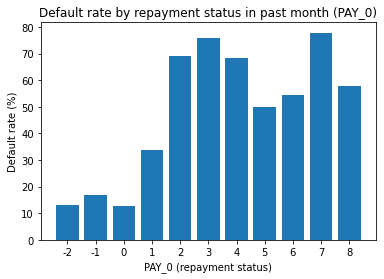

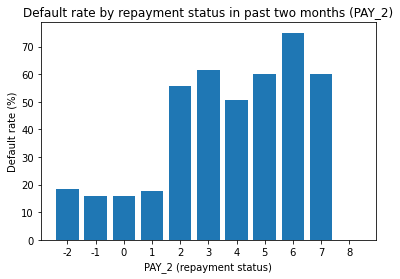

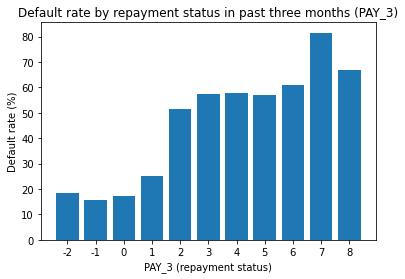

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_default_rate_by_pay_status(df, pay_col, target_col='default.payment.next.month', title=None):
    # Compute default rate by category
    rate = (df.groupby(pay_col)[target_col]
              .mean()
              .sort_index()) * 100

    plt.figure()
    plt.bar(rate.index.astype(str), rate.values)
    plt.title(title or f"Default rate by {pay_col}")
    plt.xlabel(f"{pay_col} (repayment status)")
    plt.ylabel("Default rate (%)")
    plt.xticks(rotation=0)
    plt.show()

# Plots
plot_default_rate_by_pay_status(df, 'PAY_0', title="Default rate by repayment status in past month (PAY_0)")
plot_default_rate_by_pay_status(df, 'PAY_2', title="Default rate by repayment status in past two months (PAY_2)")
plot_default_rate_by_pay_status(df, 'PAY_3', title="Default rate by repayment status in past three months (PAY_3)")

In [ ]:
### Results of repayment behavior and default risk
"""
The analysis of repayment status variables (PAY_0, PAY_2, and PAY_3) shows a clear and consistent pattern: default rates increase significantly as repayment delays become more severe. Borrowers who are current on payments exhibit low default rates, while those with recent payment delays show sharply higher probabilities of default.
The effect is strongest for PAY_0, which captures the most recent repayment status. This indicates that recent delinquency is a powerful early warning signal of future default.
This suggests that recent delinquency is a strong early warning signal of future default and reinforces the importance of repayment history in predicting credit risk.
"""

'\n### EDA Summary: Repayment behavior and default risk\n\nThe analysis of repayment status variables (PAY_0, PAY_2, and PAY_3) shows a clear and consistent pattern: default rates increase significantly as repayment delays become more severe. Borrowers who are current on payments exhibit low default rates, while those with recent payment delays show sharply higher probabilities of default.\nThe effect is strongest for PAY_0, which captures the most recent repayment status. This indicates that recent delinquency is a powerful early warning signal of future default.\nThis suggests that recent delinquency is a strong early warning signal of future default and reinforces the importance of repayment history in predicting credit risk.\n\n'

### 3. Default rate by credit limit (LIMIT_BAL)

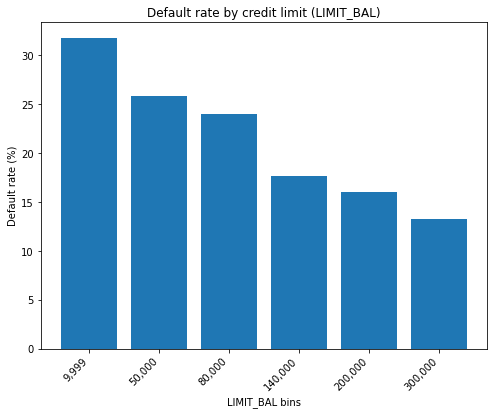

In [214]:
plot_default_rate_by_binned_numeric(
    df,
    num_col='LIMIT_BAL',
    bins=6,
    strategy='quantile',
    title="Default rate by credit limit (LIMIT_BAL)"
)


In [ ]:
### Results of credit limit and default risk
"""
The chart shows a clear inverse relationship between credit limit and default risk. Borrowers with lower credit limits have noticeably higher default rates, while those with higher limits demonstrate progressively lower default risk.
This suggests that credit capacity is a meaningful indicator of financial stability. Customers with stronger credit profiles and higher limits are less likely to default.
"""

### 4. Default rate by recent payment amount (PAY_AMT1)

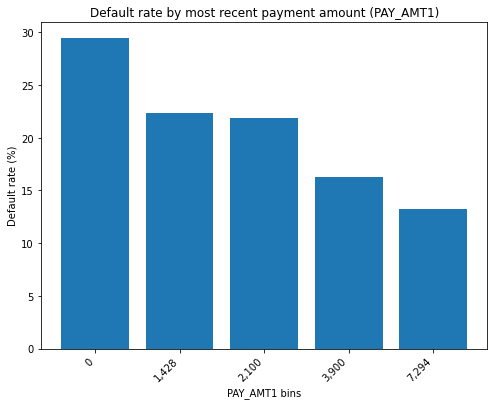

In [211]:
plot_default_rate_by_binned_numeric(
    df,
    num_col='PAY_AMT1',
    bins=6,
    strategy='quantile',
    title="Default rate by most recent payment amount (PAY_AMT1)"
)


In [215]:
###  Results of default rate by recent payment amount (PAY_AMT1)
"""
Default risk decreases as recent payment amounts increase. Borrowers making smaller payments exhibit higher default rates, while those making larger payments show progressively lower risk.
This reinforces that repayment capacity is an important indicator of credit stability.
"""


'\nDefault risk decreases as recent payment amounts increase. Borrowers making smaller payments exhibit higher default rates, while those making larger payments show progressively lower risk.\nThis reinforces that repayment capacity is an important indicator of credit stability.\n'

### 5. Default rate by recent outstanding bill/debts ('BILL_AMT1')

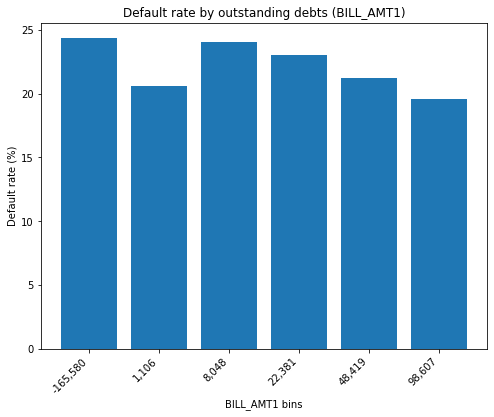

In [218]:
plot_default_rate_by_binned_numeric(
    df,
    num_col='BILL_AMT1',
    bins=6,
    strategy='quantile',
    title="Default rate by outstanding debts (BILL_AMT1)"
)


In [220]:
###  Results of default rate by recent outstanding bill/debts (BILL_AMT1)
"""
The chart shows no clear relationship between outstanding bill amounts and default risk. Default rates do not consistently increase as the bill amount grows, indicating that the size of the debt alone is not a strong predictor of default
"""

'\nThe chart shows no clear relationship between outstanding bill amounts and default risk. Default rates do not consistently increase as the bill amount grows, indicating that the size of the debt alone is not a strong predictor of default\n'

### 6. Default rate by age of the borrower ('AGE')

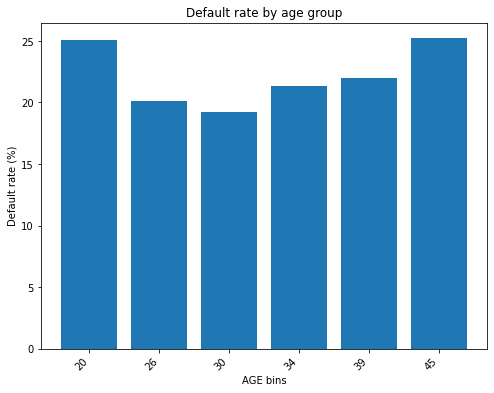

In [221]:
# Default rate by AGE (binned)

plot_default_rate_by_binned_numeric(
    df,
    num_col='AGE',
    bins=6,
    strategy='quantile',
    title="Default rate by age group"
)


In [ ]:
###  Results of default rate by age of the borrower (AGE)
"""
The age distribution for defaulters and non-defaulters is broadly similar. There is no significant pattern indicating that age alone is a strong predictor of default risk. The differences in default rates are relatively small compared to other features like repayment behavior and credit capacity.
"""

'\nThe age distribution for defaulters and non-defaulters is broadly similar, with substantial overlap in both the median and interquartile range. Defaulters tend to be slightly younger on average, but the difference is modest. This suggests that age alone is not a strong predictor of default risk, though it may contribute marginally when combined with financial and repayment features.\n\n'

### 7. Default rate by gender of the borrower ('SEX')

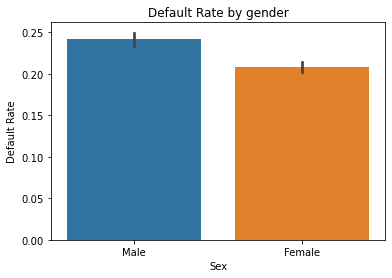

In [224]:
# Default rate by GENDER
sns.barplot(
    x='SEX',
    y='default.payment.next.month',
    data=df
)

plt.title('Default Rate by gender')
plt.xlabel('Sex')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


In [225]:
###  Results of default rate by gender of the borrower (SEX)
"""
The default rates for male and female borrowers are relatively similar, with only a small difference between the two groups. This suggests that gender is not a strong predictor of default risk in this dataset. The slight variation observed is likely due to other factors, such as repayment behavior or credit capacity, rather than gender itself.
"""

'\nThe default rates for male and female borrowers are relatively similar, with only a small difference between the two groups. This suggests that gender is not a strong predictor of default risk in this dataset. The slight variation observed is likely due to other factors, such as repayment behavior or credit capacity, rather than gender itself.\n'

### 8. Default rate by education of the borrower ('EDUCATION')

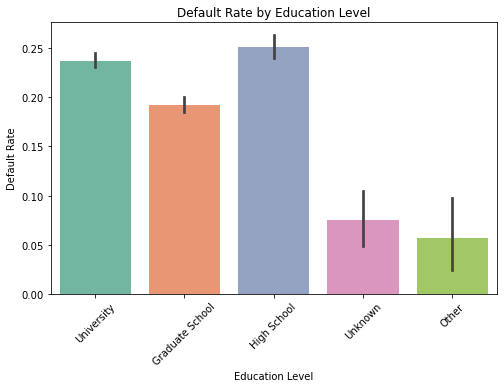

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean education categories
education_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Other",
    0: "Unknown",
    5: "Unknown",
    6: "Unknown"
}

df['EDUCATION_LABEL'] = df['EDUCATION'].map(education_labels)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x='EDUCATION_LABEL',
    y='default.payment.next.month',
    data=df,
    palette="Set2"
)

plt.title("Default Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()


In [230]:
###  Results of default rate by education of the borrower (EDUCATION)
"""
There is no clear trend showing that one education level is strongly associated with a higher or lower risk of default. This suggests that factors beyond education, such as repayment behavior and credit capacity, are stronger predictors of default risk.
"""

'\nThere is no clear trend showing that one education level is strongly associated with a higher or lower risk of default. This suggests that factors beyond education, such as repayment behavior and credit capacity, are stronger predictors of default risk.\n'

### 9. Default rate by marriage status of the borrower ('MARRIAGE')

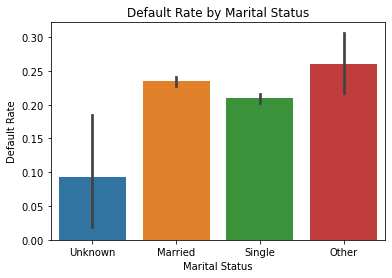

In [231]:
sns.barplot(
    x='MARRIAGE',
    y='default.payment.next.month',
    data=df
)

plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Default Rate')
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['Unknown', 'Married', 'Single', 'Other']
)
plt.show()

In [ ]:
###  Results of default rate by marriage status of the borrower (MARRIAGE)
"""
Default rates vary slightly across marital status categories, but the differences are not substantial. There is no strong pattern indicating that marital status alone is a key driver of default risk.
Overall, behavioral variables such as repayment history and payment amounts remain more influential predictors of default.

"""

### Wrap up of the EDA 

- Repayment delays show a strong and consistent relationship with default risk.
- Default rates increase significantly as recent payment delays become more severe.
- Lower credit limits are associated with higher default rates.
- Smaller recent payment amounts correspond to higher default risk.
- Demographic factors (age, gender, education, marital status) show limited variation in default risk.

Overall, repayment behavior and credit capacity emerge as the strongest indicators of default risk.


## Model development

### 1. Logistic regression model -baseline

We first define the target variable and independent variables 
* The target variable represents whether a borrower defaults in the following month. 
* The independent set includes borrower demographics, credit capacity, repayment history, and billing information etc
* Identifier variables that do not contain predictive information are removed.


In [187]:
# Define target variable and independent variables
# Define target variable
y = df['default.payment.next.month']
X = df.drop(columns=['ID', 'default.payment.next.month'])

In [188]:
X.shape, y.shape

# This confirms that the predictors matrix (X) contains 23 independent variables and the target vector (y) contains the binary default outcome for all 30,000 observations.


((30000, 23), (30000,))

In [189]:
# Train test split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # reproducibility
    stratify=y          # keeps same default rate in train and test
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24000, 23), (6000, 23), (24000,), (6000,))

#### Independent variabes scaling

Since our dataset contains features with different scales (e.g., credit limits, bills, repayment statuses, etc.), it's important to standardize them.

If we train a logistic regression model without scaling, variables with large values may have a stronger influence on the model

To prevent this, we standardize them so that they are on a similar scale. This allows the model to learn from all variables more fairly and improves stability during training.

"""

In [190]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data ONLY
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled

"""
The scaler is fitted only on the training data to prevent data leakage. 
The test data is transformed using the same parameters learned from the training set.

"""


'\nThe scaler is fitted only on the training data to prevent data leakage. \nThe test data is transformed using the same parameters learned from the training set.\n\n'

In [191]:
# build the logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8078333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:
 [[4529  144]
 [1009  318]]


In [192]:
### Logistic regression baseline results

"""
The logistic regression model achieved an overall accuracy of 81%. However, because the dataset is imbalanced, accuracy alone is not a reliable indicator of performance.
The model performs very well at identifying non-defaulters (97% recall). However, it performs poorly at identifying defaulters, with a recall of only 24%. This means that the model correctly identifies only 318 out of 1,327 actual defaulters and misses 1,009 defaulters (false negatives).
From a business perspective, false negatives are particularly costly because they represent high-risk customers who are incorrectly predicted as safe. Missing these borrowers could lead to significant financial losses.
The dataset is imbalanced, with significantly fewer defaulters than non-defaulters. In this context, overall accuracy can be misleading. From a business perspective, failing to identify a customer who will default (false negative) can result in financial loss. Therefore, recall for the default class is the most important metric in this analysis. This project prioritizes maximizing recall of defaulters while maintaining reasonable precision.
"""

'\nThe logistic regression model achieved an overall accuracy of 81%. However, because the dataset is imbalanced, accuracy alone is not a reliable indicator of performance.\nThe model performs very well at identifying non-defaulters (97% recall). However, it performs poorly at identifying defaulters, with a recall of only 24%. This means that the model correctly identifies only 318 out of 1,327 actual defaulters and misses 1,009 defaulters (false negatives).\nFrom a business perspective, false negatives are particularly costly because they represent high-risk customers who are incorrectly predicted as safe. Missing these borrowers could lead to significant financial losses.\nThe dataset is imbalanced, with significantly fewer defaulters than non-defaulters. In this context, overall accuracy can be misleading. From a business perspective, failing to identify a customer who will default (false negative) can result in financial loss. Therefore, recall for the default class is the most imp

### 2. Logistic regression with class weights

The baseline model showed very low recall for defaulters (24%), meaning most high-risk borrowers were missed. Since identifying defaulters is the primary business objective, improving recall is critical.

Before moving to a more complex model such as a Decision Tree, we first attempt to improve performance within logistic regression by addressing class imbalance. One common technique for handling class imbalance is adjusting class weights;the model penalizes misclassification of defaulters more heavily. This allows us to test whether handling imbalance alone improves recall before introducing additional model complexity such as decision tree model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression with class weights to handle imbalance
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

log_reg_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

print("Logistic Regression (class_weight='balanced') Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

Logistic Regression (class_weight='balanced') Results:
Confusion Matrix:
 [[3254 1419]
 [ 504  823]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



In [194]:
# The balanced logistic regression results
"""
The balanced logistic regression significantly improves recall for defaulters from 24% to 62%. The model now correctly identifies 823 out of 1,327 defaulters, reducing missed defaulters from 1,009 in the baseline model to 504 ie cutting false negatives nearly in half compared to the baseline model.
Although overall accuracy decreases from 81% to 68%, this trade-off is expected when prioritizing the minority class. From a business perspective, reducing false negatives is critical because each missed defaulter represents potential financial loss.
"""

'\nThe balanced logistic regression significantly improves recall for defaulters from 24% to 62%. The model now correctly identifies 823 out of 1,327 defaulters, reducing missed defaulters from 1,009 in the baseline model to 504 ie cutting false negatives nearly in half compared to the baseline model.\nAlthough overall accuracy decreases from 81% to 68%, this trade-off is expected when prioritizing the minority class. From a business perspective, reducing false negatives is critical because each missed defaulter represents potential financial loss.\n'

#### Feature importance of the balanced logistic regression

The coefficients indicate which variables increase or decrease the likelihood of default. Positive coefficients increase default risk, while negative coefficients reduce it.


In [195]:
# Create dataframe of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg_balanced.coef_[0]
})

# Sort by absolute importance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top 10 most important features
coef_df[['Feature', 'Coefficient']].head(10)


,Feature,Coefficient
5,PAY_0,0.590164
11,BILL_AMT1,-0.285593
17,PAY_AMT1,-0.184645
18,PAY_AMT2,-0.160172
0,LIMIT_BAL,-0.136679
6,PAY_2,0.101266
2,EDUCATION,-0.094105
7,PAY_3,0.090108
4,AGE,0.079707
12,BILL_AMT2,0.079305


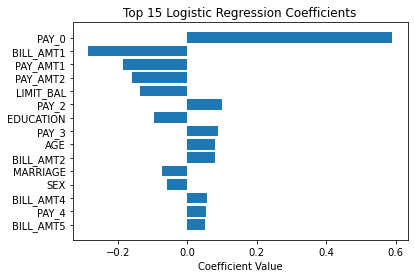

In [196]:
# Display top 10 most important features
coef_df[['Feature', 'Coefficient']].head(10)

import matplotlib.pyplot as plt

top_features = coef_df[['Feature', 'Coefficient']].head(15)

plt.figure()
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.gca().invert_yaxis()
plt.title("Top 15 Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

In [197]:
# # The features importance results
"""
The most influential predictor of default is recent repayment status (PAY_0), which reflects whether a borrower has recently delayed payments. Higher values indicate more severe payment delays, strongly increasing default risk.
Other repayment history variables (PAY_2, PAY_3) also contribute positively to default risk, reinforcing that recent delinquency is a strong warning signal.
In contrast, higher recent payment amounts (PAY_AMT1, PAY_AMT2) and higher credit limits (LIMIT_BAL) are associated with lower default risk. This suggests that borrowers who maintain stronger repayment behavior and have greater credit capacity are less likely to default.

#### Key Variable Groups

**Repayment Status Variables**
- PAY_0: Repayment status in September (most recent month before default)
- PAY_2: Repayment status in August
- PAY_3: Repayment status in July  

These variables capture recent payment delays.

**Billing and Payment Variables**
- BILL_AMT1, BILL_AMT2: Monthly bill statement amounts  
- PAY_AMT1, PAY_AMT2: Actual payment amounts made  

These reflect outstanding balances and repayment behavior.

**Customer Characteristics**
- LIMIT_BAL: Total credit limit granted  
- AGE: Customer age  
- EDUCATION, SEX, MARRIAGE: Demographic attributes 


Overall, the model confirms that;
1. Recent repayment behavior is the strongest driver of default risk
2. Higher credit limit reduced default risk (negative coefficient)

"""

'\nThe most influential predictor of default is recent repayment status (PAY_0), which reflects whether a borrower has recently delayed payments. Higher values indicate more severe payment delays, strongly increasing default risk.\nOther repayment history variables (PAY_2, PAY_3) also contribute positively to default risk, reinforcing that recent delinquency is a strong warning signal.\nIn contrast, higher recent payment amounts (PAY_AMT1, PAY_AMT2) and higher credit limits (LIMIT_BAL) are associated with lower default risk. This suggests that borrowers who maintain stronger repayment behavior and have greater credit capacity are less likely to default.\n\n#### Key Variable Groups\n\n**Repayment Status Variables**\n- PAY_0: Repayment status in September (most recent month before default)\n- PAY_2: Repayment status in August\n- PAY_3: Repayment status in July  \n\nThese variables capture recent payment delays.\n\n**Billing and Payment Variables**\n- BILL_AMT1, BILL_AMT2: Monthly bill st

### 3. Building the decision tree model

After improving logistic regression by addressing class imbalance, we next evaluate a Decision Tree model. Unlike logistic regression, which assumes a linear relationship between features and the target, Decision Trees can capture nonlinear patterns and complex feature interactions.

This allows us to assess whether a more flexible, nonparametric model can further improve recall for defaulters.

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Train model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.7145

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000


Confusion Matrix:
 [[3741  932]
 [ 781  546]]


In [199]:
## Decision Tree Results
"""
The Decision Tree model achieved an overall accuracy of 71%. Recall for defaulters improved to 41%, compared to 24% in the baseline logistic regression. This reduces missed defaulters from 1,009 to 781.
However, when compared to the balanced logistic regression model (62% recall), the default Decision Tree does not perform as well at identifying high-risk borrowers.
Although the tree is capable of capturing nonlinear relationships, it does not yet outperform logistic regression when class imbalance is properly addressed. Therefore, we next retrain the Decision Tree using class weights to determine whether imbalance handling can further improve recall.
"""

'\nThe Decision Tree model achieved an overall accuracy of 71%. Recall for defaulters improved to 41%, compared to 24% in the baseline logistic regression. This reduces missed defaulters from 1,009 to 781.\nHowever, when compared to the balanced logistic regression model (62% recall), the default Decision Tree does not perform as well at identifying high-risk borrowers.\nAlthough the tree is capable of capturing nonlinear relationships, it does not yet outperform logistic regression when class imbalance is properly addressed. Therefore, we next retrain the Decision Tree using class weights to determine whether imbalance handling can further improve recall.\n'

### 4. Decision tree with class weights

The default Decision Tree improved recall compared to the baseline logistic regression, but it did not outperform the balanced logistic regression model. Since class imbalance has proven to significantly impact performance, we retrain the Decision Tree using `class_weight='balanced'`.

This adjustment penalizes misclassification of defaulters more heavily and allows us to assess whether combining model flexibility with imbalance handling further improves recall.


In [200]:
# Decision Tree with class weight balancing
dt_balanced = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

# Train model
dt_balanced.fit(X_train, y_train)

# Predictions
y_pred_dt_balanced = dt_balanced.predict(X_test)

# Evaluation
print("Decision Tree (class_weight='balanced') Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_balanced))


Decision Tree (class_weight='balanced') Results
Accuracy: 0.7288333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      4673
           1       0.38      0.38      0.38      1327

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000


Confusion Matrix:
 [[3873  800]
 [ 827  500]]


In [201]:
"""
The balanced Decision Tree achieved an accuracy of 73%. However, recall for defaulters decreased to 38%, identifying only 500 out of 1,327 defaulters and missing 827 high-risk borrowers.
When compared to the balanced logistic regression model (62% recall), the Decision Tree performs substantially worse at detecting defaulters. Although the tree captures nonlinear relationships, increasing model complexity does not improve minority class detection in this case.
These results suggest that addressing class imbalance has a greater impact on recall than switching to a more flexible model.
"""

'\nThe balanced Decision Tree achieved an accuracy of 73%. However, recall for defaulters decreased to 38%, identifying only 500 out of 1,327 defaulters and missing 827 high-risk borrowers.\nWhen compared to the balanced logistic regression model (62% recall), the Decision Tree performs substantially worse at detecting defaulters. Although the tree captures nonlinear relationships, increasing model complexity does not improve minority class detection in this case.\nThese results suggest that addressing class imbalance has a greater impact on recall than switching to a more flexible model.\n'

## Final model selection

Among all models evaluated, the balanced logistic regression achieved the highest recall for defaulters (62%), outperforming the baseline logistic regression (24%) and both Decision Tree models (41% and 38%).

Since the primary objective is to identify high-risk borrowers and reduce financial losses from missed defaults, recall was prioritized. The balanced model reduces missed defaulters from 1,009 to 504, cutting false negatives nearly in half.

Final Model Performance:
- Recall (Defaulters): 62%
- Precision (Defaulters): 37%
- Accuracy: 68%

Given its superior ability to detect default risk, the balanced logistic regression is selected as the final model.

#### Limitations

Improving recall comes at the expense of precision, meaning some low-risk borrowers may be incorrectly flagged as high-risk. In practice, this could lead to unnecessary review or stricter credit conditions for certain customers.

Additionally, the model relies on historical repayment behavior. Changes in economic conditions or customer behavior may affect future performance, requiring ongoing monitoring and recalibration.

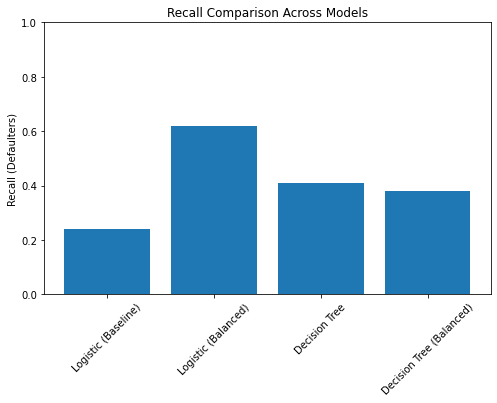

In [235]:
import matplotlib.pyplot as plt

models = [
    "Logistic (Baseline)",
    "Logistic (Balanced)",
    "Decision Tree",
    "Decision Tree (Balanced)"
]

recalls = [0.24, 0.62, 0.41, 0.38]

plt.figure(figsize=(8,5))
plt.bar(models, recalls)
plt.title("Recall Comparison Across Models")
plt.ylabel("Recall (Defaulters)")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()


## Business recommendations

The analysis shows that recent repayment behavior is the strongest indicator of future default. Borrowers with recent payment delays are significantly more likely to default in the following month.

Based on these findings, the bank/financial institutions should:

- Closely monitor customers with recent missed or delayed payments, as they exhibit significantly higher default risk.
- Implement early intervention strategies such as reminder notifications or repayment support for at-risk customers.
-  Carefully review credit limits, recognizing that customers with stronger credit profiles and higher limits tend to demonstrate lower default risk.
-  Use dynamic credit limit adjustments as part of ongoing risk management, rewarding consistent repayment behavior while reducing exposure to higher-risk borrowers.
-  Deploy the model as a risk-screening tool to flag high-risk accounts for further review rather than relying on automatic rejection.

By proactively identifying borrowers who show early warning signs, the bank can reduce credit losses and improve overall portfolio risk management.
